# Setup

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

# Data

In [55]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [56]:
print("Training set dimension: {}".format(train.shape))
print("Test set dimension: {}".format(test.shape))
print(train.info())
print(train.head())

Training set dimension: (42000, 785)
Test set dimension: (28000, 784)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...  

In [57]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
X_train = train.loc[:,'pixel0':'pixel783']
y_train = train.loc[:,'label']
X_test = test.copy()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(42000, 784)
(42000,)
(28000, 784)


In [33]:
print("Number of categories: {}".format(len(y_train.value_counts())))
print(y_train.value_counts().sort_index())

Number of categories: 10
0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64


# Visualization

Each image has 28 pixels height and width. Each pixel indicates brightness, 0 to 255, with higher number meaning darker.<br>
pixel0 to pixel27 is the first row of an image, and pixel28 to pixel 55 is the second row of an image.

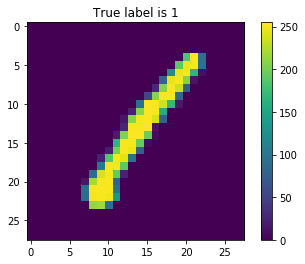

In [17]:
temp = X_train.loc[0,:]
temp = temp.values.reshape((28, 28)) 

label = y_train[0]

plt.figure()
plt.imshow(temp)
plt.colorbar()
plt.grid(False)
plt.title("True label is {}".format(label))
plt.show()

# Preprocess

In [45]:
print("Maximum pixel value is {}".format(max(X_train.max())))
print("Minimum pixel value is {}".format(min(X_train.min())))

Maximum pixel value is 255
Minimum pixel value is 0


Scale the values to be 0 to 1.

In [46]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [28]:
print("Maximum pixel value is {}".format(max(X_train.max())))
print("Minimum pixel value is {}".format(min(X_train.min())))

Maximum pixel value is 1.0
Minimum pixel value is 0.0


# Model

In [36]:
# build
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu, input_shape = (28*28,)))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

In [37]:
# compile
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# Training

In [39]:
EPOCH = 5

model.fit(X_train, y_train, epochs = EPOCH, verbose = 1, validation_split = 0.3)

Train on 29399 samples, validate on 12601 samples
Epoch 1/5
29399/29399 [==============================] - 3s 106us/sample - loss: 0.0437 - acc: 0.9869 - val_loss: 0.0353 - val_acc: 0.9898
Epoch 2/5
29399/29399 [==============================] - 3s 101us/sample - loss: 0.0296 - acc: 0.9920 - val_loss: 0.0423 - val_acc: 0.9871
Epoch 3/5
29399/29399 [==============================] - 3s 101us/sample - loss: 0.0233 - acc: 0.9939 - val_loss: 0.0447 - val_acc: 0.9855
Epoch 4/5
29399/29399 [==============================] - 3s 101us/sample - loss: 0.0184 - acc: 0.9950 - val_loss: 0.0521 - val_acc: 0.9833
Epoch 5/5
29399/29399 [==============================] - 4s 123us/sample - loss: 0.0162 - acc: 0.9956 - val_loss: 0.0530 - val_acc: 0.9817


# Prediction of training set

In [61]:
pred_train = model.predict(X_train)

In [67]:
pred_train[0]

array([1.1951544e-08, 9.9998045e-01, 1.3063799e-06, 7.9783176e-09,
       1.5779250e-07, 6.2043304e-09, 3.3642038e-06, 3.0084098e-07,
       1.4391294e-05, 4.3363420e-11], dtype=float32)

In [68]:
np.argmax(pred_train[0])

1

In [69]:
# true label
y_train[0]

1

In [70]:
pred_train[1]

array([1.0000000e+00, 2.0651602e-16, 1.9087785e-11, 6.0766313e-16,
       2.9095857e-18, 1.6222427e-13, 1.7588719e-11, 2.2503019e-10,
       2.3592980e-15, 5.6883906e-09], dtype=float32)

In [71]:
np.argmax(pred_train[1])

0

In [72]:
# true label
y_train[1]

0

The location of prediction is exactly the predicted label!

# Prediction of test set

In [73]:
pred_test = model.predict(X_test)

In [74]:
pred_test.shape

(28000, 10)

In [75]:
pred_test[0]

array([2.1378488e-11, 2.8957447e-18, 1.0000000e+00, 3.6764716e-09,
       7.9960767e-11, 3.1626946e-15, 2.8298636e-10, 1.9422955e-10,
       4.0187806e-10, 1.3040258e-13], dtype=float32)

In [76]:
np.argmax(pred_test[0])

2

# Submission

In [81]:
test_id = np.arange(1, X_test.shape[0]+1,1)
test_id

array([    1,     2,     3, ..., 27998, 27999, 28000])

In [82]:
predictions = np.argmax(pred_test, axis = 1)

In [83]:
print(test_id.shape)
print(predictions.shape)

(28000,)
(28000,)


In [84]:
sub = pd.DataFrame(data = {'ImageId':test_id,
                           'Label':predictions})

In [85]:
sub.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [87]:
# sub.to_csv('C:\\Users\\yukic\\Documents\\kaggle\\digit_recognizer\\submission_190724.csv', index = False)